In [ ]:
# ! pip install faraway

### Step 0

In [ ]:
# CodeGrade step0

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve



### Step 1

*  [Data](https://rdrr.io/cran/faraway/man/pima.html)
*  [Faraway](https://pypi.org/project/faraway/)

In [ ]:
# CodeGrade step0

# Install faraway if not already installed
%pip install faraway

# Load the Dataset from faraway
from faraway.datasets import pima

# Load the dataset
data = pima.load()

# Convert 'diabetes' column to int type to represent classes 0 and 1
data['test'] = data['test'].astype(int)

print(data.head())
print("\nTarget distribution:\n", data['test'].value_counts())



Note: you may need to restart the kernel to use updated packages.
   pregnant  glucose  diastolic  triceps  insulin   bmi  diabetes  age  test
0         6      148         72       35        0  33.6     0.627   50     1
1         1       85         66       29        0  26.6     0.351   31     0
2         8      183         64        0        0  23.3     0.672   32     1
3         1       89         66       23       94  28.1     0.167   21     0
4         0      137         40       35      168  43.1     2.288   33     1

Target distribution:
 test
0    500
1    268
Name: count, dtype: int64


In [ ]:
# Display the first few rows and info
display(data.head())
print("\nInfo:")
print(data.info())

print("\nMissing values per column:")
print(data.isna().sum())
zero_as_missing = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']
existing = [c for c in zero_as_missing if c in data.columns]

for col in existing:
    data[col] = data[col].replace(0, np.nan)

# Median imputation
for col in existing:
    data[col] = data[col].fillna(data[col].median())

print("Zero→NaN + median imputation applied to:", existing)



,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   diastolic  768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   diabetes   768 non-null    float64
 7   age        768 non-null    int64  
 8   test       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing values per column:
pregnant     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
diabetes     0
age          0
test         0
dtype: int64
Zero→NaN + median imputation applied to: ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']


In [ ]:
# CodeGrade step1

# Shape
# Check the dataset’s shape to determine the number of rows and columns.
print("\nShape (rows, cols):", data.shape)


Shape (rows, cols): (768, 9)


### Step 2

In [ ]:
# CodeGrade step2

#  Define Features and Scale the Data
# Define features (X) and target (y)
feature_cols = [c for c in data.columns if c != 'test']
X = data[feature_cols].astype(float)
y = data['test'].astype(int)
# Scale the features
scaler = None
X_scaled = None

# Split the dataset into training (80%) and testing (20%) sets; set seed to 42
# Use the usual naming convention
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

# Standardize the features using StandardScaler (fit on train only to avoid leakage).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
# Give the shapes separated by commas
print("Train shape:", X_train_scaled.shape, " | Test shape:", X_test_scaled.shape)

Train shape: (614, 8)  | Test shape: (154, 8)


### Step 3


In [ ]:
# CodeGrade step3

# Build and Train the Logistic Regression Model
# Instantiate the logistic regression model
# Call this a model
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=RANDOM_STATE)


# Train the model on the training set
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities and classes; call these y_pred_proba and y_pred

y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred  = log_reg.predict(X_test_scaled)  # default threshold = 0.5
# Confusion Matrix, call this and then return it as cm
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

### Step 4

In [ ]:
# CodeGrade step4

from sklearn.metrics import precision_score, recall_score

# Call the classification report "report"; return the precision for '0'

report = classification_report(y_test, y_pred, digits=3, output_dict=True)
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("Confusion Matrix (rows=true, cols=pred):\n", cm)
print("\nPrecision for class 0:", report['0']['precision'])

Accuracy : 0.708
Precision: 0.600
Recall   : 0.500

Classification Report:
              precision    recall  f1-score   support

           0      0.752     0.820     0.785       100
           1      0.600     0.500     0.545        54

    accuracy                          0.708       154
   macro avg      0.676     0.660     0.665       154
weighted avg      0.699     0.708     0.701       154

Confusion Matrix (rows=true, cols=pred):
 [[82 18]
 [27 27]]

Precision for class 0: 0.7522935779816514


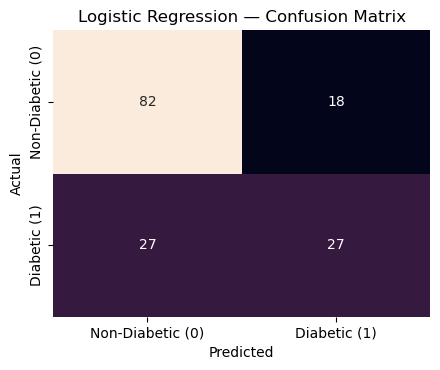

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(4.5, 3.8))
sns.heatmap(
    cm, annot=True, fmt='d', cbar=False,
    xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'],
    yticklabels=['Non-Diabetic (0)', 'Diabetic (1)']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression — Confusion Matrix')
plt.tight_layout()
plt.show()

### Step 5

In [ ]:
# CodeGrade step5

# Calculate AUC, call this auc
auc = roc_auc_score(y_test, y_proba)

# Calculate ROC curve by finding fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Return the following
auc, sum(fpr), sum(tpr), sum(thresholds)

(0.812962962962963, 12.82, 30.61111111111111, inf)

In [ ]:
# Print ROC Curve
